In [1]:
%matplotlib inline

In [36]:
import numpy as np
from PIL import Image
import scipy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

np.seterr(all='ignore')

{'divide': 'warn', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

## Introduction

During my university we had to create an application in Java that would show the mandelbrot set. The main thing I remember from that is that I had no idea what I was doing. In retribution of myself, I will write this blogpost to finally fully understand the Mandelbrot set. 

In [2]:
def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
    re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
    im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
    return re[np.newaxis, :] + im[:, np.newaxis] * 1j

In [3]:
np.linspace(0.1, 0.2, int((0.2 - 0.1) * 20))[:, None]

array([[0.1],
       [0.2]])

In [4]:
def is_stable(c, num_iterations):
    z = 0
    for _ in range(num_iterations):
        z = z ** 2 + c
    return abs(z) <= 2

In [5]:
vals = complex_matrix(0, 0.3, 0.5, 0.8, 20)
print(vals.shape)
vals

(6, 6)


array([[0.  +0.5j , 0.06+0.5j , 0.12+0.5j , 0.18+0.5j , 0.24+0.5j ,
        0.3 +0.5j ],
       [0.  +0.56j, 0.06+0.56j, 0.12+0.56j, 0.18+0.56j, 0.24+0.56j,
        0.3 +0.56j],
       [0.  +0.62j, 0.06+0.62j, 0.12+0.62j, 0.18+0.62j, 0.24+0.62j,
        0.3 +0.62j],
       [0.  +0.68j, 0.06+0.68j, 0.12+0.68j, 0.18+0.68j, 0.24+0.68j,
        0.3 +0.68j],
       [0.  +0.74j, 0.06+0.74j, 0.12+0.74j, 0.18+0.74j, 0.24+0.74j,
        0.3 +0.74j],
       [0.  +0.8j , 0.06+0.8j , 0.12+0.8j , 0.18+0.8j , 0.24+0.8j ,
        0.3 +0.8j ]])

In [35]:
import numpy as np
is_stable(vals, num_iterations=20)

TypeError: seterr() got an unexpected keyword argument 'complex'

In [7]:
def get_members(c, num_iterations):
    mask = is_stable(c, num_iterations)
    return c[mask]


In [8]:
m = get_members(vals, num_iterations=20)
m

array([0.  +0.5j , 0.06+0.5j , 0.12+0.5j , 0.18+0.5j , 0.24+0.5j ,
       0.3 +0.5j , 0.  +0.56j, 0.06+0.56j, 0.12+0.56j, 0.18+0.56j,
       0.24+0.56j, 0.3 +0.56j, 0.  +0.62j, 0.06+0.62j, 0.12+0.62j])

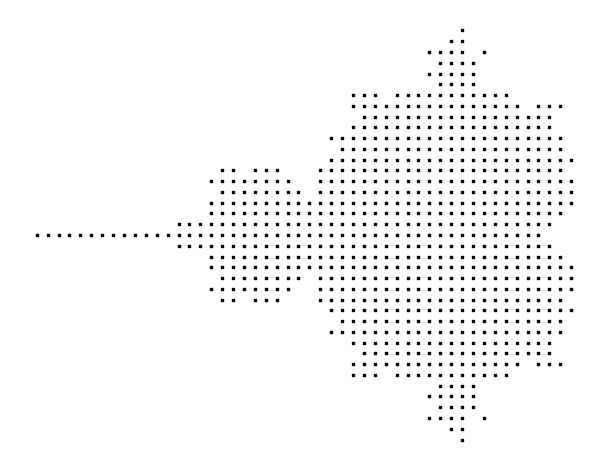

In [9]:
import matplotlib.pyplot as plt
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=21)
m = get_members(c, num_iterations=20)
plt.scatter(m.real, m.imag, color="black", marker=",", s=1)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

In [10]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def one_update(x):
    global X
    X += 0.1
    return np.sin(x + 0.1)

def do_one(d):
    global X
    Y = one_update(X)
    ax.clear()
    ax.plot(Y)
    # plot_data(centroids+2, X, n_samples, ax=ax)

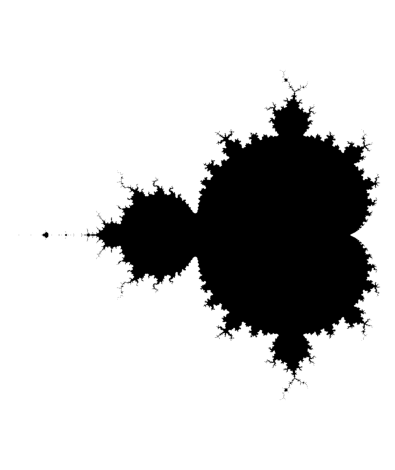

In [11]:
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
plt.imshow(is_stable(c, num_iterations=20), cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

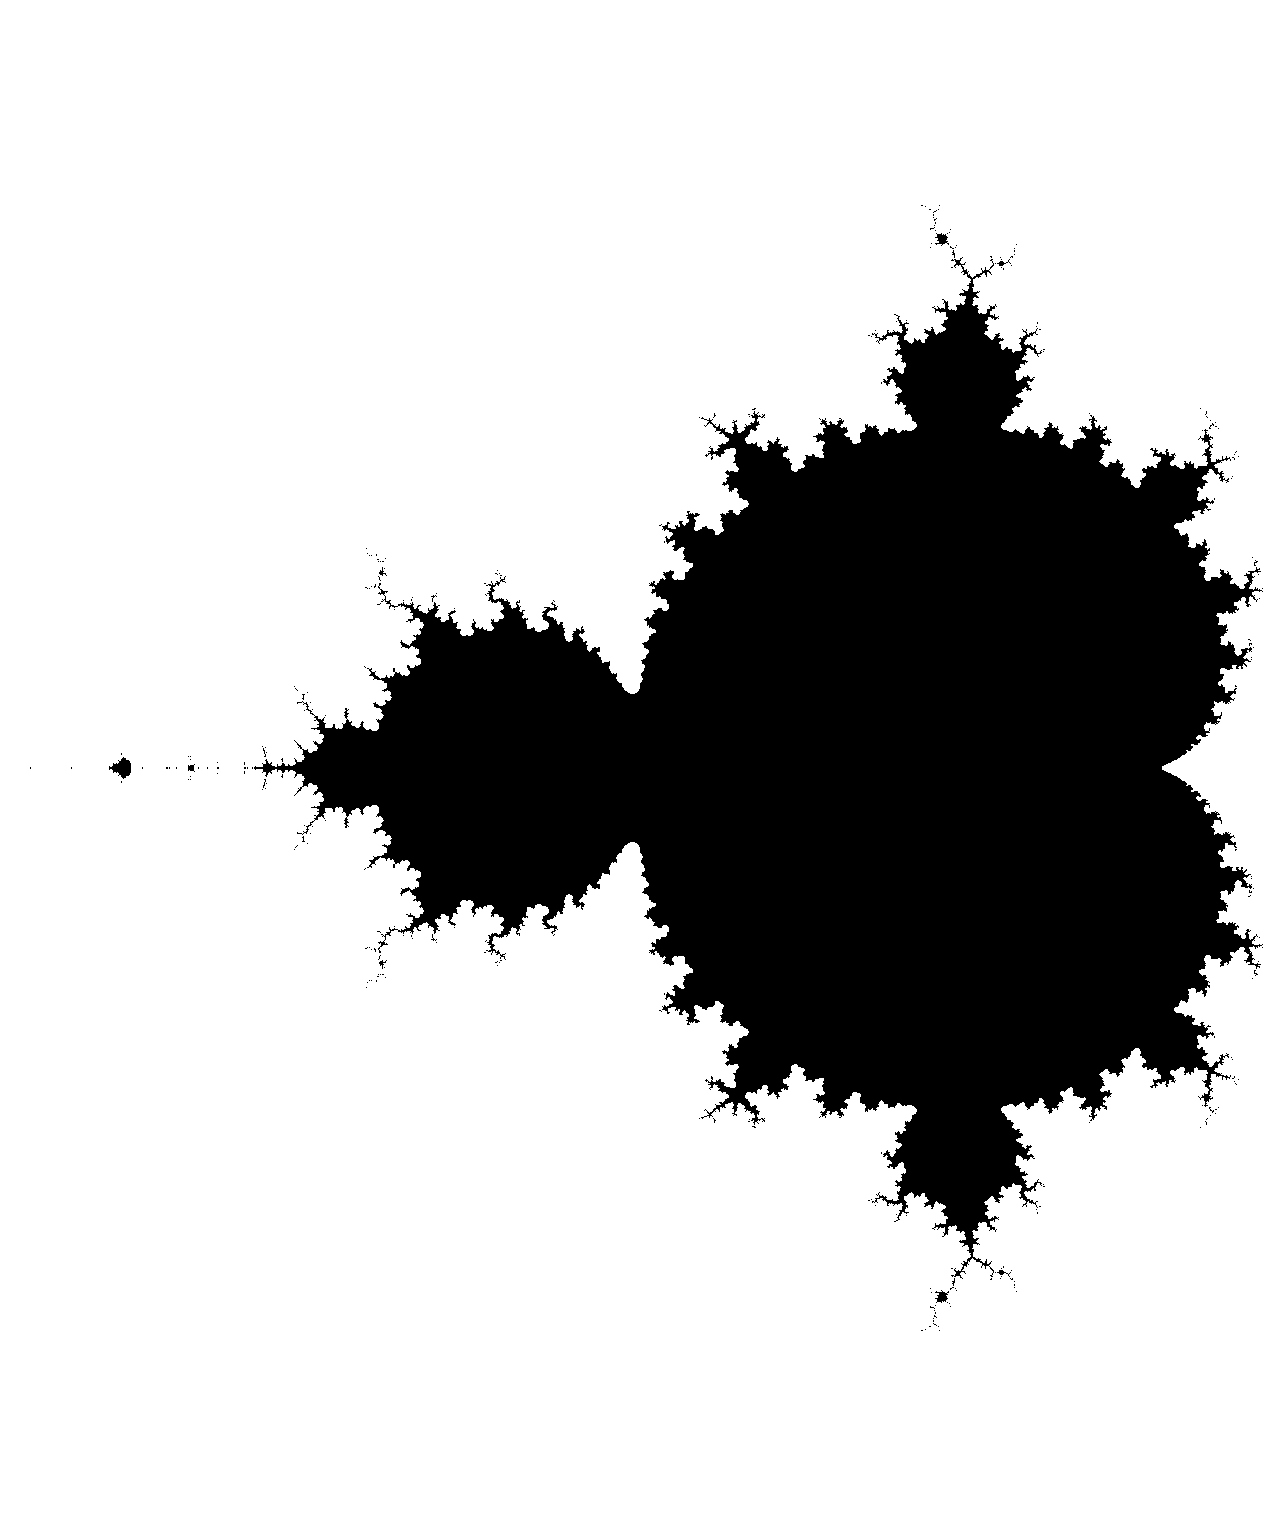

In [12]:
from PIL import Image
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
image = Image.fromarray(~is_stable(c, num_iterations=20))
image

In [13]:
image.size

(1280, 1536)

In [14]:
from dataclasses import dataclass

@dataclass
class MandelbrotSet:
    max_iterations: int

    def __contains__(self, c: complex) -> bool:
        return self.stability(c) == 1

    def stability(self, c: complex) -> float:
        return self.escape_count(c) / self.max_iterations

    def escape_count(self, c: complex) -> int:
        z = 0
        for iteration in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return iteration
        return self.max_iterations

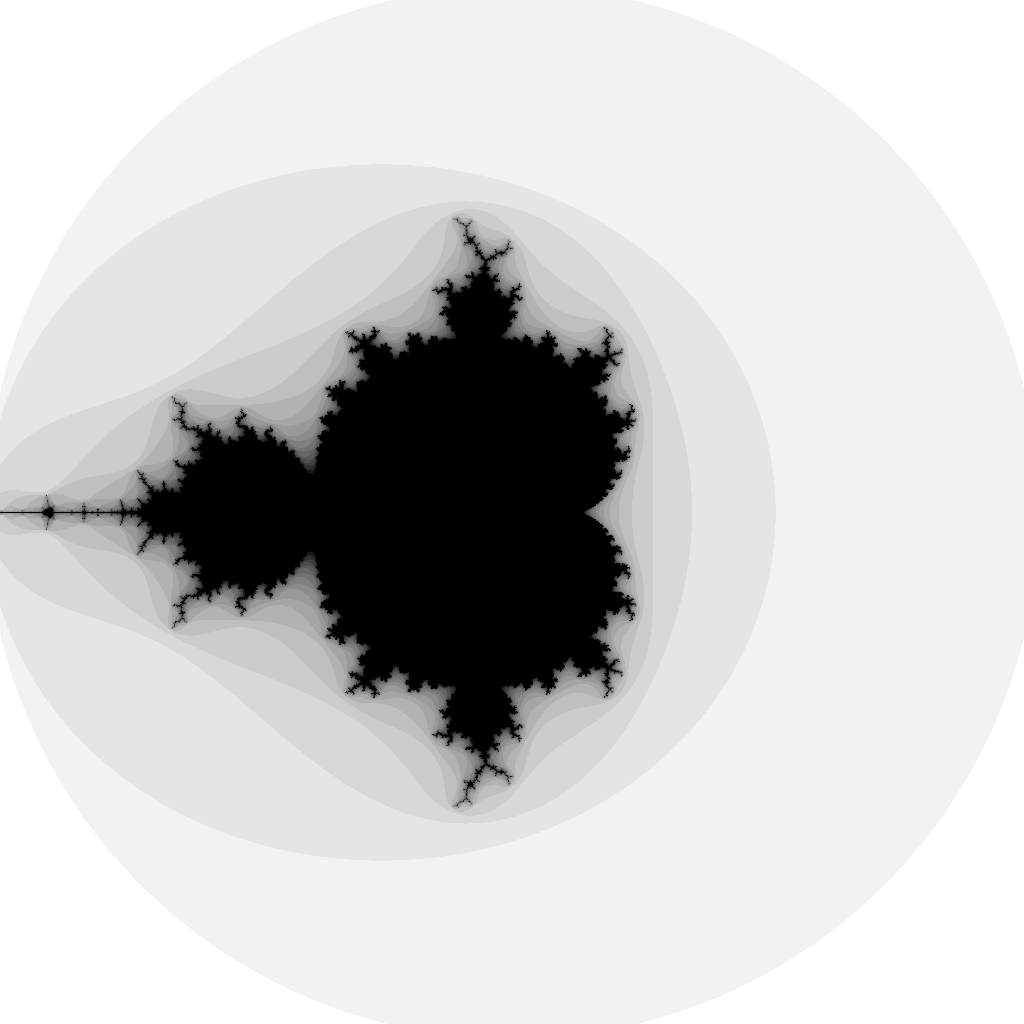

In [15]:
mandelbrot_set = MandelbrotSet(max_iterations=20)

width, height = 1024, 1024
scale = 0.0038
GRAYSCALE = "L"

from PIL import Image
image = Image.new(mode=GRAYSCALE, size=(width, height))
for y in range(height):
    for x in range(width):
        c = scale * complex(x - width / 2, height / 2 - y)
        instability = 1 - mandelbrot_set.stability(c)
        image.putpixel((x, y), int(instability * 255))

image

In [16]:
from math import log

def escape_count(c: complex, smooth=False, max_iterations: int = 20, escape_radius=2.0):
        z = 0
        for iteration in range(max_iterations):
            z = z ** 2 + c
            if abs(z) > escape_radius:
                if smooth:
                    return iteration + 1 - log(log(abs(z))) / log(2)
                return iteration
        return max_iterations

In [17]:
escape_count(c=0.26, smooth=False, max_iterations=50)

29

In [18]:
escape_count(c=0.26, smooth=True, max_iterations=50)


29.529059720873665

In [19]:
from dataclasses import dataclass
from PIL import Image

@dataclass
class Viewport:
    image: Image.Image
    center: complex
    width: float

    @property
    def height(self):
        return self.scale * self.image.height

    @property
    def offset(self):
        return self.center + complex(-self.width, self.height) / 2

    @property
    def scale(self):
        return self.width / self.image.width

    def __iter__(self):
        for y in range(self.image.height):
            for x in range(self.image.width):
                yield Pixel(self, x, y)

In [20]:
from dataclasses import dataclass
from math import log

@dataclass
class MandelbrotSet:
    max_iterations: int
    escape_radius: float = 2.0

    def __contains__(self, c: complex) -> bool:
        return self.stability(c) == 1

    def stability(self, c: complex, smooth=False, clamp=True) -> float:
        value = self.escape_count(c, smooth) / self.max_iterations
        return max(0.0, min(value, 1.0)) if clamp else value

    def escape_count(self, c: complex, smooth=False) -> int | float:
        z = 0
        for iteration in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > self.escape_radius:
                if smooth:
                    return iteration + 1 - log(log(abs(z))) / log(2)
                return iteration
        return self.max_iterations

In [21]:
@dataclass
class Pixel:
    viewport: Viewport
    x: int
    y: int

    @property
    def color(self):
        return self.viewport.image.getpixel((self.x, self.y))

    @color.setter
    def color(self, value):
        self.viewport.image.putpixel((self.x, self.y), value)

    def __complex__(self):
        return (
                complex(self.x, -self.y)
                * self.viewport.scale
                + self.viewport.offset
        )

In [22]:
mandelbrot_set.stability(1 + 1j)

0.05

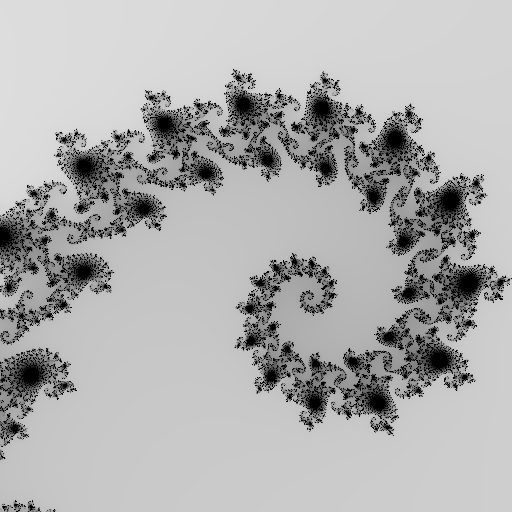

In [23]:
from PIL import Image

mandelbrot_set = MandelbrotSet(max_iterations=256, escape_radius=1000)

image = Image.new(mode="L", size=(512, 512))
for pixel in Viewport(image, center=-0.7435 + 0.1314j, width=0.002):
    c = complex(pixel)
    instability = 1 - mandelbrot_set.stability(c, smooth=True)
    pixel.color = int(instability * 255)

image

In [24]:
import numpy as np
from scipy.interpolate import interp1d

def make_gradient(colors, interpolation="linear"):
    X = [i / (len(colors) - 1) for i in range(len(colors))]
    Y = [[color[i] for color in colors] for i in range(3)]
    channels = [interp1d(X, y, kind=interpolation) for y in Y]
    return lambda x: [np.clip(channel(x), 0, 1) for channel in channels]

In [25]:
def denormalize(palette):
    return [
        tuple(int(channel * 255) for channel in color)
        for color in palette
    ]

In [26]:
from PIL.ImageColor import getrgb

def hsb(hue_degrees: int, saturation: float, brightness: float):
    return getrgb(
        f"hsv({hue_degrees % 360},"
        f"{saturation * 100:.8f}%,"
        f"{brightness * 100}%)"
    )

hsb(360, 0.75, 1)

(255, 64, 64)

In [27]:
def paint(mandelbrot_set, viewport, palette, smooth):
    for pixel in viewport:
        stability = mandelbrot_set.stability(complex(pixel), smooth)
        index = int(min(stability * len(palette), len(palette) - 1))
        pixel.color = palette[index % len(palette)]

In [28]:
mandelbrot_set = MandelbrotSet(max_iterations=20, escape_radius=1000)
for pixel in Viewport(image, center=-0.75 + 0.5j, width=0.5):
    stability = mandelbrot_set.stability(complex(pixel), smooth=True)
    pixel.color = (0, 0, 0) if stability == 1 else hsb(
        hue_degrees=int(stability * 360),
        saturation=stability,
        brightness=1,
    )

image

TypeError: color must be int or single-element tuple

In [99]:
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=512)
# image = Image.fromarray(~is_stable(c, num_iterations=20))
# image
c.shape

(1536, 1280)

In [29]:
from matplotlib.colors import hsv_to_rgb

In [30]:
def stability_to_color(s):
    return hsv_to_rgb(np.stack([s, s, np.where(s<1.0, 1, 0)]).transpose(1, 2, 0))

In [45]:
np.abs(1 + 1j)

1.4142135623730951

In [46]:
import matplotlib.cm
colormap = matplotlib.cm.get_cmap("twilight").colors
palette = denormalize(colormap)

len(colormap)

colormap[0]

palette[0]

C:\Users\BaukeBrenninkmeijer\AppData\Local\Temp\ipykernel_25616\1875112318.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = matplotlib.cm.get_cmap("twilight").colors


(225, 216, 226)

## First attempt 

This code is my first attempt at implementing the mandelbrot algorithm and return the stability. It has some issues, which is that it's not that fast, due to the several steps of masking done with `np.where`. This can definitely be improved, such as reducing the masking steps and not having to do an `isnan` check. You can see this version takes about 1.5s for each stability calculations. 

In [79]:
%%timeit
def matrix_stability_v1(c, max_iterations: int = 20, escape_radius: float = 5, smooth: bool = False, debug: bool = False):
    stability = np.zeros_like(c).astype(float)
    z = np.zeros_like(c).astype(float)
    for iteration in trange(max_iterations):
        z = z ** 2 + c
        if smooth:
            new_stability = np.where(np.abs(z) > escape_radius, iteration + 1 - np.log(np.log(np.abs(z))) / np.log(2), 0)
            where_zero = np.where(stability == 0, 1, 0)
            update = new_stability * where_zero
            update = np.where(np.isnan(update), 0, update)
            if debug:
                print('new stability')
                print(new_stability)
                print('new zero')
                print(where_zero)
                print('update')
                print(update)
            stability += update
        else:
            new_stability = np.where(np.abs(z) > escape_radius, iteration , 0)
            where_zero = np.where(stability == 0, 1, 0)
            update = new_stability * where_zero
            if debug:
                print('new stability')
                print(new_stability)
                print('new zero')
                print(where_zero)
                print('update')
                print(update)
            stability += update

    scaled_stability = stability / max_iterations
    return np.where(scaled_stability == 0, 1, scaled_stability)

s = matrix_stability_v1(c, max_iterations=20, escape_radius=10, smooth=False, debug=False)
s

<magic-timeit>:2: ComplexWarning: Casting complex values to real discards the imaginary part
<magic-timeit>:3: ComplexWarning: Casting complex values to real discards the imaginary part


1.57 s ± 48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Attempt 2
Having done some research into fast numpy implementations, the new version is like this. It only masks once, which is one of the improvements mentioned, and also applies this masking to all operations rather than multiplying with it, which also improves speed. This version takes only about 800-850ms which is almost half the time of the previous version. 

In [100]:
from tqdm import tqdm, trange

def matrix_stability_v2(c, max_iter: int = 20, escape_radius: float = 5, smooth: bool = False):
    # stability = np.zeros_like(c).astype(float)
    z = np.empty(c.shape, np.complex64)
    iters = np.full(c.shape, max_iter)
    for i in trange(max_iter):
        mask = (iters >= max_iter)
        z[mask] = z[mask] ** 2 + c[mask]
        if smooth:
            exploded = (z.real ** 2 + z.imag ** 2 > escape_radius)
            iters[mask & exploded] = i + 1 - np.log(np.log(np.abs(z[mask & exploded]))) / np.log(2)
        else: 
            iters[mask & (z.real ** 2 + z.imag ** 2 > escape_radius)] = i + 1
    return iters / max_iter

s = matrix_stability_v2(c, max_iter=20, escape_radius=10, smooth=False)
s

100%|██████████| 20/20 [00:00<00:00, 24.28it/s]


array([[0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       ...,
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1]])

## Domain calculation

Rather than specifying a start and end for both the real and imaginary part, we can also give a center point and a width. The simplifies defining a location somewhat. 

In [101]:
def center_width_to_xy(center, width):
    delta = width / 2
    return (center.real - delta, center.real + delta, center.imag - delta, center.imag + delta)

In [107]:
center=-0.7435 + 0.1314j
width=0.002

c = complex_matrix(*center_width_to_xy(center, width), pixel_density=1024/width)
s = matrix_stability_v2(c, max_iter=256, escape_radius=1000, smooth=True)

  0%|          | 0/256 [00:00<?, ?it/s]

100%|██████████| 256/256 [00:05<00:00, 49.49it/s]


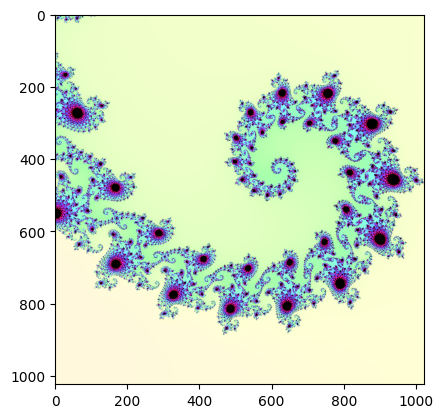

In [109]:
plt.imshow(stability_to_color(s))

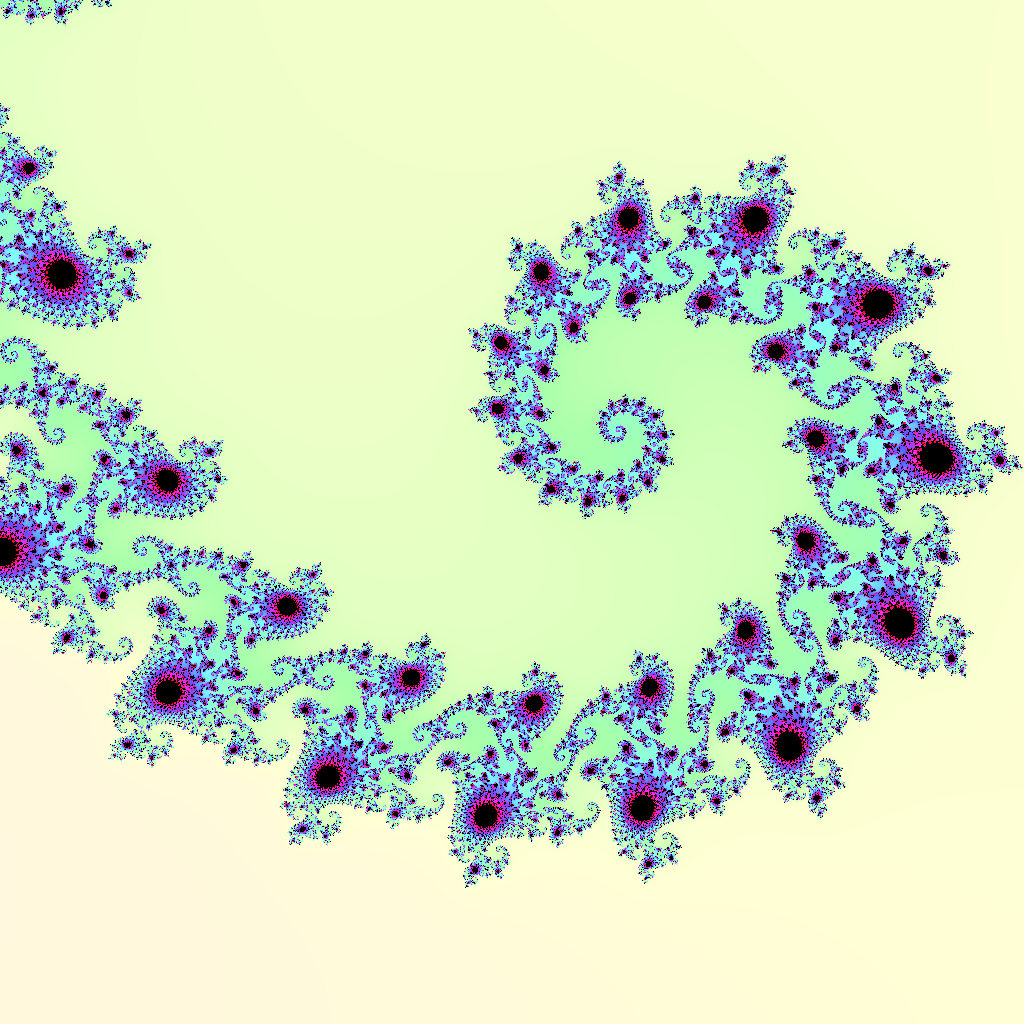

In [110]:
Image.fromarray((stability_to_color(s)*255).astype(np.uint8), mode='RGB')

In [ ]:
s = matrix_stability(c, max_iter=20, escape_radius=100, smooth=True, debug=False)
mask = np.ma.masked_values(s, value=1.0)

for i in np.arange(0, 5, 0.1):
    clear_output(wait=True)
    n = (s + i) % 1
    n = np.where(self.mask.mask, 1, self.x)
    plt.imshow(stability_to_color(n))

In [122]:
from IPython.display import clear_output

s = matrix_stability_v2(c, max_iter=20, escape_radius=100, smooth=True)
mask = np.ma.masked_values(s, value=1.0)

class Drawer:
    def __init__(self, delta, s, ax, mask_value=1.0):
        self.delta = delta
        self.s = s
        self.x = self.s
        self.mask = np.ma.masked_values(s, value=mask_value)
        self.ax = ax
        
    def draw_one(self, frame=None):
        self.ax.clear()
        self.x = (self.x + self.delta) % 1
        n = np.where(self.mask.mask, 1, self.x)
        self.ax.imshow(stability_to_color(n))


100%|██████████| 20/20 [00:00<00:00, 32.31it/s]


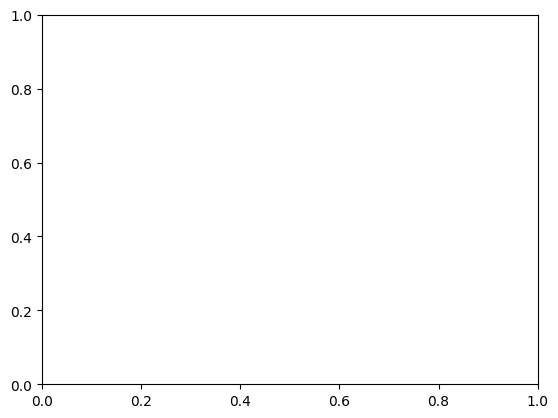

In [123]:
fig, ax = plt.subplots()
d = Drawer(s=s, delta=0.1, ax=ax)

In [125]:
d.draw_one()
plt.show()

In [127]:
# create your own animation
center=-0.7435 + 0.1314j
width=0.002


c = complex_matrix(*center_width_to_xy(center, width), pixel_density=1024/width)
s = matrix_stability_v2(c, max_iter=256, escape_radius=1000, smooth=True)


fig,ax = plt.subplots()
d = Drawer(s=s, delta=0.05, ax=ax)
ani = FuncAnimation(fig, d.draw_one, frames=20, interval=100, repeat=False)
plt.close()
HTML(ani.to_jshtml())

  0%|          | 0/256 [00:00<?, ?it/s]

100%|██████████| 256/256 [00:05<00:00, 50.76it/s]


In [ ]:
Image.fromarray((stability_to_color(s)*255).astype(int), mode='RGB')

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def one_update(x):
    global X
    X += 0.1
    return np.sin(x + 0.1)

def do_one(d):
    global X
    Y = one_update(X)
    ax.clear()
    ax.plot(Y)
    # plot_data(centroids+2, X, n_samples, ax=ax)